In [ ]:
""" Now I am computing a age field, subtracting 2020 from the year field and dropping the year field"""

data_vw["age_of_car"] = 2020 - data_vw["year"]
data_vw = data_vw.drop(columns = ["year"])
data_vw.sample(10)




In [35]:
# Import Libraries for EDA

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

Pre-processing for modeling
I like to use pd.get_dummies option over OHE in SKLearn to get the one hot encoded variables for the categorical variables. It is usually tidy on the dataset and the column names are preserved.

data_vw_expanded = pd.get_dummies(data_vw)
data_vw_expanded.head()




Applying the standard scalar option to standardize all the variables in the dataset.

std = StandardScaler()
data_vw_expanded_std = std.fit_transform(data_vw_expanded)
data_vw_expanded_std = pd.DataFrame(data_vw_expanded_std, columns = data_vw_expanded.columns)
print(data_vw_expanded_std.shape)
data_vw_expanded_std.head()


# split data 

X_train, X_test, y_train, y_test = train_test_split(data_vw_expanded_std.drop(columns = ['price']), data_vw_expanded_std[['price']])
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


In [8]:
# Import Dataset
df= pd.read_csv('../data/toyota.csv')

In [9]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [10]:
#subtracting 2020 from the year field and dropping the year field

df["age_of_car"] = 2020 - df["year"]
df = df.drop(columns = ["year"])


In [11]:
df.sample(10)


,model,price,transmission,mileage,fuelType,tax,mpg,engineSize,age_of_car
5118,Aygo,7195,Automatic,26000,Petrol,0,67.0,1.0,5
5699,C-HR,13450,Manual,13752,Petrol,145,47.9,1.2,3
160,Corolla,17890,Manual,3695,Petrol,150,39.2,1.2,1
283,Corolla,21995,Automatic,4800,Hybrid,135,85.6,1.8,1
4531,Aygo,6060,Manual,13100,Petrol,0,69.0,1.0,6
2225,Yaris,8200,Manual,17305,Petrol,30,58.0,1.3,5
356,RAV4,32995,Automatic,7017,Hybrid,135,49.6,2.5,1
4072,Aygo,9995,Semi-Auto,350,Petrol,145,56.5,1.0,1
2345,Yaris,9495,Automatic,26897,Petrol,30,58.0,1.3,4
252,Corolla,23505,Automatic,9264,Hybrid,135,78.5,1.8,1


In [21]:
# One Hot Enconding with SCKLEARN
# make a list with the categorical variables

vars_categorical = ['model', 'transmission', 'fuelType']

In [15]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['price'], axis=1),  # predictors
    df['price'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5390, 8)
(1348, 8)
(5390,)
(1348,)


In [30]:
df_expanded = pd.get_dummies(df)
df_expanded.head()

,price,mileage,tax,mpg,engineSize,age_of_car,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,16000,24089,265,36.2,2.0,4,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,15995,18615,145,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,13998,27469,265,36.2,2.0,5,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,18998,14736,150,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,17498,36284,145,36.2,2.0,3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [33]:
df_expanded.to_csv("../data/toyota_ohe.csv")

In [31]:
# let's separate into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(
    df_expanded.drop(labels=['price'], axis=1),  # predictors
    df_expanded['price'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5390, 31)
(1348, 31)
(5390,)
(1348,)


In [36]:
scaler = StandardScaler()

In [37]:
# fit the scaler to train set
scaler.fit(X_train)
# transform scaler to train and test
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
scaler.mean_

array([2.28328944e+04, 9.49035250e+01, 6.31238590e+01, 1.47450835e+00,
       3.23747681e+00, 1.04452690e-01, 1.70686456e-02, 2.89610390e-01,
       7.23562152e-02, 1.66975881e-03, 4.06307978e-02, 9.64749536e-03,
       1.31725417e-02, 1.29870130e-03, 6.86456401e-03, 2.59740260e-03,
       3.50649351e-02, 7.16141002e-02, 2.04081633e-03, 5.56586271e-04,
       1.74397032e-02, 3.71057514e-04, 3.13543599e-01, 3.97588126e-01,
       5.64935065e-01, 1.85528757e-04, 3.72912801e-02, 7.45825603e-02,
       3.07235622e-01, 1.46567718e-02, 6.03525046e-01])

In [39]:
scaler.scale_

array([1.88606320e+04, 7.39123984e+01, 1.54823342e+01, 4.37342592e-01,
       2.16130714e+00, 3.05846899e-01, 1.29527244e-01, 4.53581538e-01,
       2.59076810e-01, 4.08285527e-02, 1.97433371e-01, 9.77467196e-02,
       1.14013271e-01, 3.60140899e-02, 8.25678010e-02, 5.08984882e-02,
       1.83943974e-01, 2.57847864e-01, 4.51292743e-02, 2.35855143e-02,
       1.30902864e-01, 1.92592791e-02, 4.63933196e-01, 4.89399436e-01,
       4.95765506e-01, 1.36196305e-02, 1.89474644e-01, 2.62716581e-01,
       4.61347910e-01, 1.20174668e-01, 4.89165171e-01])

In [40]:
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [41]:
X_train_scaled.to_csv("../data/X_train_toyota_ohe_scaled.csv")

In [42]:
X_test_scaled.to_csv("../data/X_test_toyota_ohe_scaled.csv")

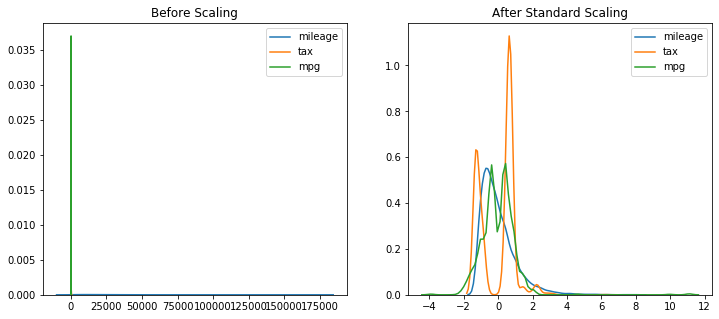

In [46]:
# PLOTING SCALING STANDARDIZATION

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['mileage'], ax=ax1)
sns.kdeplot(X_train['tax'], ax=ax1)
sns.kdeplot(X_train['mpg'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['mileage'], ax=ax2)
sns.kdeplot(X_train_scaled['tax'], ax=ax2)
sns.kdeplot(X_train_scaled['mpg'], ax=ax2)
plt.show()

In [47]:
y_train.to_csv("../data/y_train_toyota.csv")

In [48]:
y_test.to_csv("../data/y_test_toyota.csv")

In [49]:
X_train_scaled

,mileage,tax,mpg,engineSize,age_of_car,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,-0.199935,-1.284000,0.379538,-1.084981,0.815489,-0.34152,-0.131776,1.566178,-0.279285,-0.040897,...,-0.019266,-0.675838,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
1,-1.146510,0.677782,-0.983305,0.058288,-1.035242,-0.34152,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,1.479645,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
2,2.032652,-0.878114,-0.272818,-1.084981,1.278172,-0.34152,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,1.479645,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
3,-0.844399,0.677782,-0.983305,0.058288,-1.035242,-0.34152,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,1.479645,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
4,-0.599338,-0.878114,-0.272818,-0.627673,-0.109876,2.92809,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,-0.675838,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5385,-0.362336,-1.284000,0.250359,-1.084981,0.352806,-0.34152,-0.131776,1.566178,-0.279285,-0.040897,...,-0.019266,-0.675838,-0.812400,-1.139521,-0.013622,5.080937,-0.28389,-0.665952,-0.121962,0.810513
5386,1.351074,-1.284000,0.599144,0.744249,0.352806,2.92809,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,-0.675838,1.230921,-1.139521,-0.013622,-0.196814,-0.28389,1.501609,-0.121962,-1.233786
5387,-1.116818,0.677782,-0.983305,0.058288,-1.035242,-0.34152,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,1.479645,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
5388,2.023639,-0.878114,-0.498882,-0.399020,3.591587,-0.34152,-0.131776,-0.638497,-0.279285,-0.040897,...,-0.019266,1.479645,-0.812400,0.877562,-0.013622,-0.196814,-0.28389,-0.665952,-0.121962,0.810513
